# Exploratory Data Analysis and Features Engineering:
## Expecting Car Pricing Project

# Importing the cleaned and nicly structured data

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns

In [3]:
#importing the dataframe after the wrangling step

df = pd.read_csv("aut_cleaned1.csv")

In [4]:
#Setting the option to show all the columns

pd.set_option("display.max_columns", None)

# Remove the unnamed col
df.drop("Unnamed: 0", axis =1 , inplace = True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-l@k,highway-l@k,price,horsepower_binned,price_binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,0.083333,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495,Low,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,0.083333,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500,Low,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.449254,0.444444,0.383333,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500,Medium,Low,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.529851,0.504274,0.541667,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950,Low,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.529851,0.521368,0.541667,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450,Low,Low,0,1,1,0


# Exploratory Data Analysis(EDA)

## 1- Analyzing Individual Feature Patterns Using Visualization:

### A) Continous Numerical Values


In [5]:
# knowing the types of col 
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-l@k             float64
highway-l@k          float64
price                  int64
horsepower_binned     object
price_binned          object
fuel-type-diesel       int64
fuel-type-gas          int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object


 We have continous numerical value columns **(symboling, normalized-losses, wheel-base, length, width, height, curb-weight, engine-size, bore, stroke, compression-ratio, horsepower, peak-rpm, city-l@k, highway-l@k)**


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


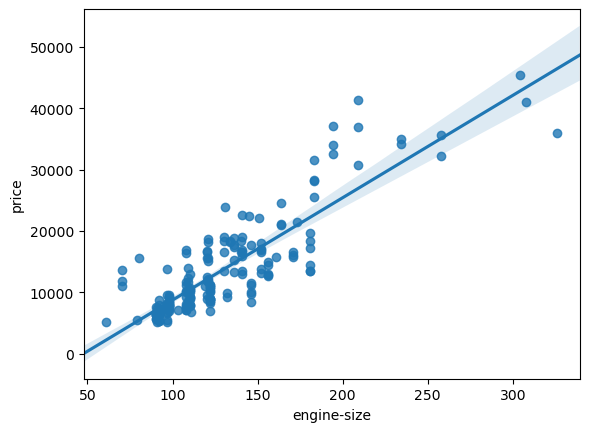

In [6]:
# visulaizing one by one through scatter plot to see the corelation

# Starting with the engine-size
sns.regplot(x= "engine-size", y= "price", data = df)

# printing the correlatino factor
df[["engine-size","price"]].corr()

,bore,price
bore,1.000000,0.543155
price,0.543155,1.000000


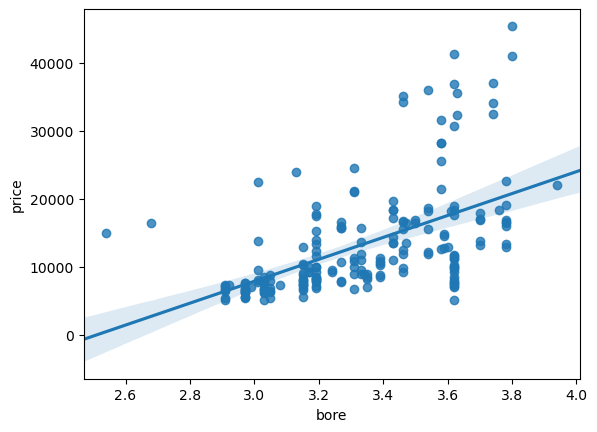

In [7]:
# bore correlation
sns.regplot(x= "bore", y="price", data =df)

#corr
df[["bore","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


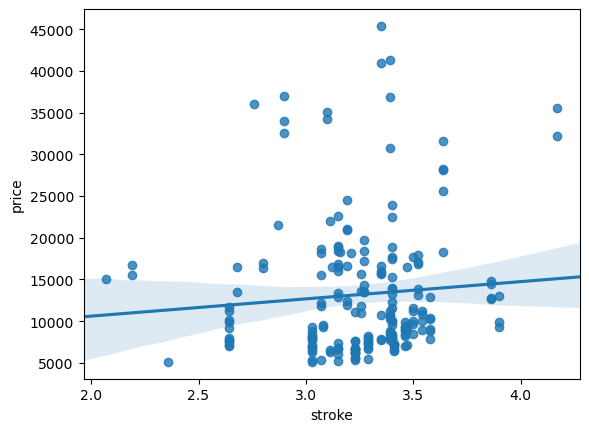

In [8]:
#stroke
sns.regplot(x="stroke" , y= "price", data =df)
df[["stroke", "price"]].corr()

,compression-ratio,price
compression-ratio,1.000000,0.071107
price,0.071107,1.000000


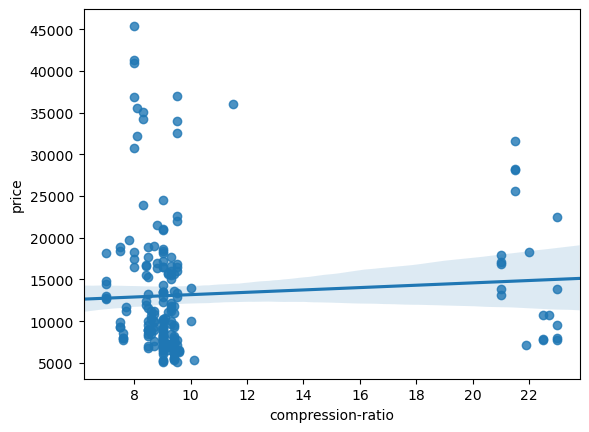

In [9]:
#compression-ratio
sns.regplot(x="compression-ratio" , y= "price", data =df)
df[["compression-ratio", "price"]].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


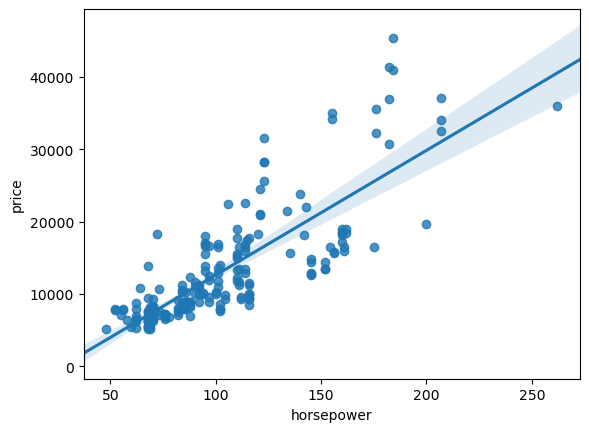

In [10]:
#horsepower
sns.regplot(x="horsepower" , y= "price", data =df)
df[["horsepower", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


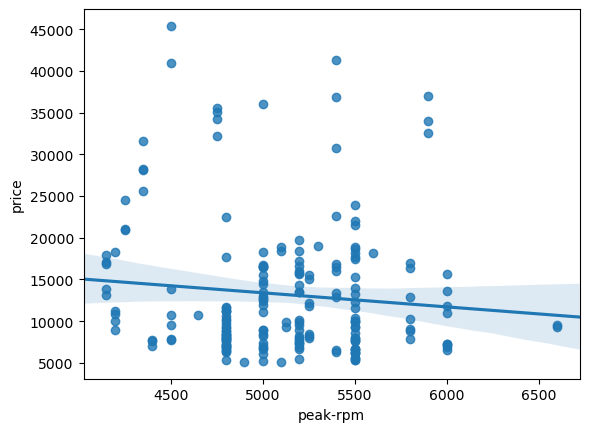

In [11]:
#peak-rpm
sns.regplot(x="peak-rpm" , y= "price", data =df)
df[["peak-rpm", "price"]].corr()

,city-l@k,price
city-l@k,1.000000,0.789898
price,0.789898,1.000000


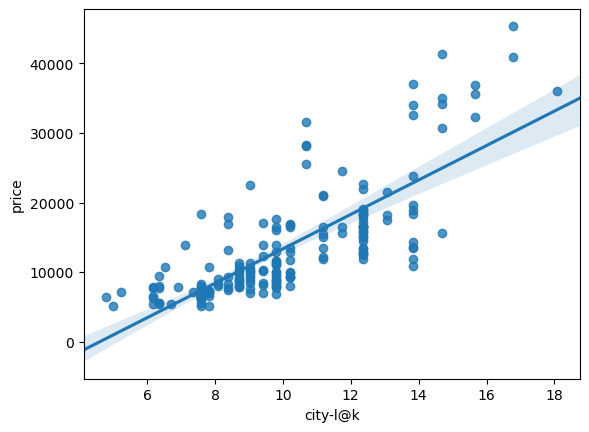

In [12]:
#city-l@k
sns.regplot(x="city-l@k" , y= "price", data =df)
df[["city-l@k", "price"]].corr()

,highway-l@k,price
highway-l@k,1.000000,0.801118
price,0.801118,1.000000


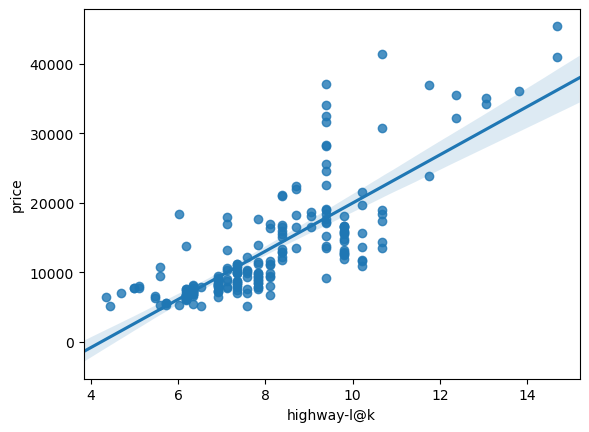

In [13]:
#highway-l@k
sns.regplot(x="highway-l@k", y= "price", data = df)
df[["highway-l@k", "price"]].corr()

,wheel-base,price
wheel-base,1.000000,0.584642
price,0.584642,1.000000


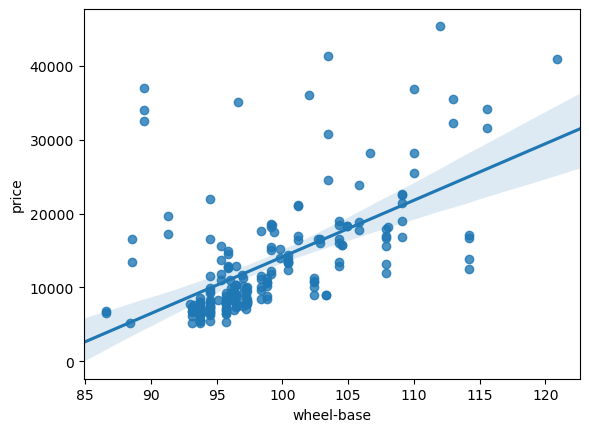

In [14]:
#wheel-base
sns.regplot(x="wheel-base", y= "price", data = df)
df[["wheel-base", "price"]].corr()

## Results:
engine size, horsepower, city-l@k and highway-l@k have **positive correlation** with price.  
bore, stroke, compression-ratio, peak-rpm and wheel-base have **week linear relation** with the price.  


### B) Categorical Variables :
there are  **make	num-of-doors	body-style	drive-wheels	engine-location	engine-type	num-of-cylinders	fuel-system** are categorical variables --   
the best way to visualize is the boxplot

In [15]:
df.select_dtypes("object")

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower_binned,price_binned
0,alfa-romero,two,convertible,rwd,front,dohc,four,mpfi,Low,Low
1,alfa-romero,two,convertible,rwd,front,dohc,four,mpfi,Low,Low
2,alfa-romero,two,hatchback,rwd,front,ohcv,six,mpfi,Medium,Low
3,audi,four,sedan,fwd,front,ohc,four,mpfi,Low,Low
4,audi,four,sedan,4wd,front,ohc,five,mpfi,Low,Low
...,...,...,...,...,...,...,...,...,...,...
196,volvo,four,sedan,rwd,front,ohc,four,mpfi,Low,Low
197,volvo,four,sedan,rwd,front,ohc,four,mpfi,Medium,Medium
198,volvo,four,sedan,rwd,front,ohcv,six,mpfi,Medium,Medium
199,volvo,four,sedan,rwd,front,ohc,six,idi,Low,Medium


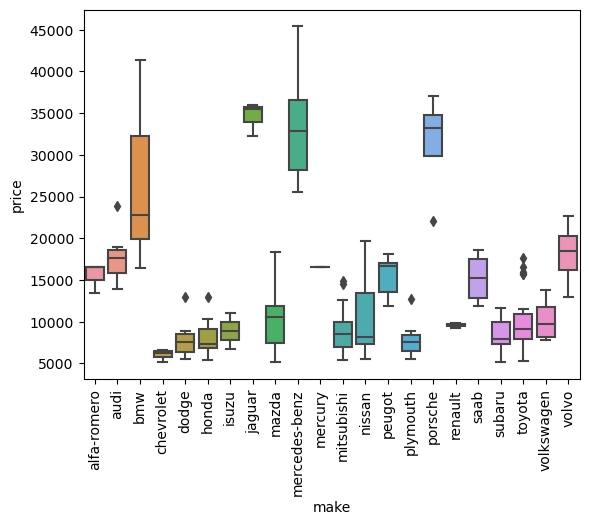

In [16]:
# make box plt viz
sns.boxplot(x="make",y= "price", data = df)
plt.pyplot.xticks(rotation=90) 
plt.pyplot.show()

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

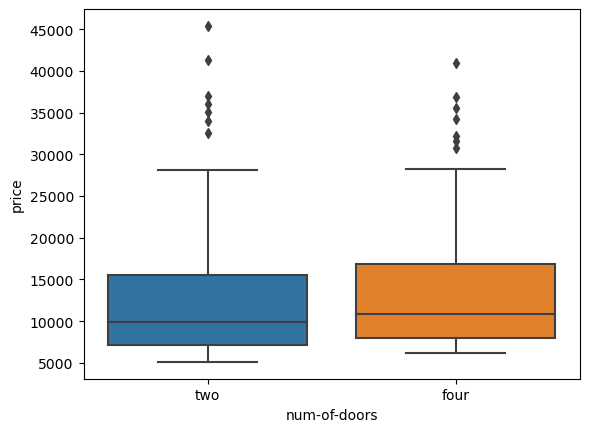

In [17]:
#num_of_doors
sns.boxplot(x="num-of-doors", y="price", data =df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

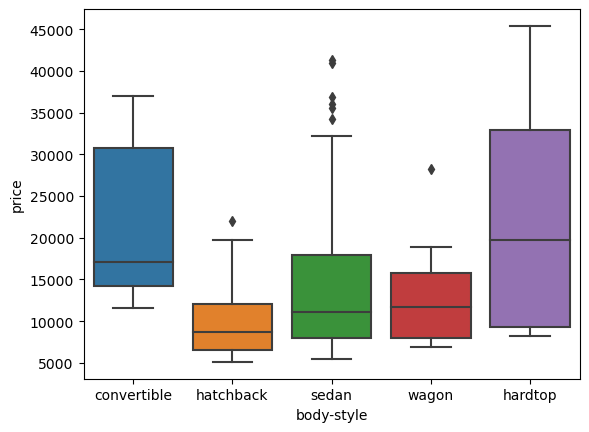

In [18]:
# body-style box plt viz
sns.boxplot(x="body-style",y= "price", data = df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

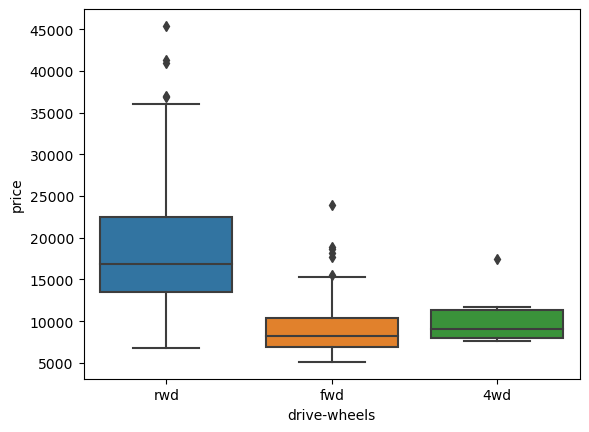

In [19]:
# drive-wheels box plt viz
sns.boxplot(x="drive-wheels",y= "price", data = df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

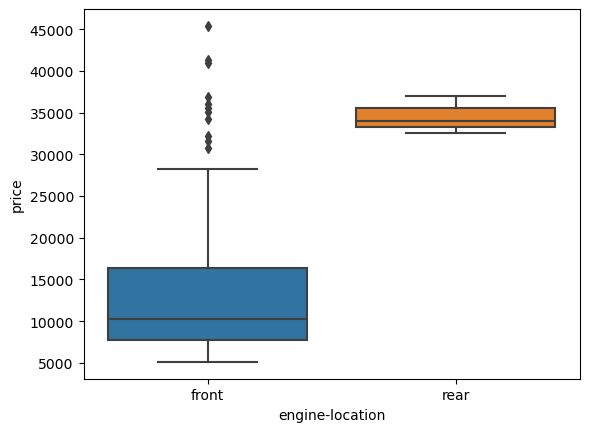

In [20]:
# engine-location box plt viz
sns.boxplot(x="engine-location",y= "price", data = df)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

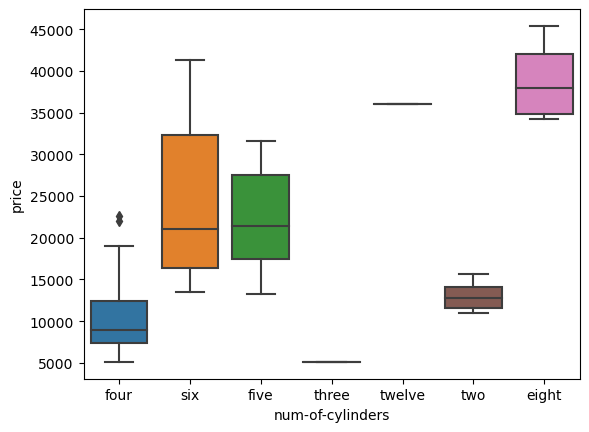

In [21]:
# num-of-cylinders box plt viz
sns.boxplot(x="num-of-cylinders",y= "price", data = df)

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

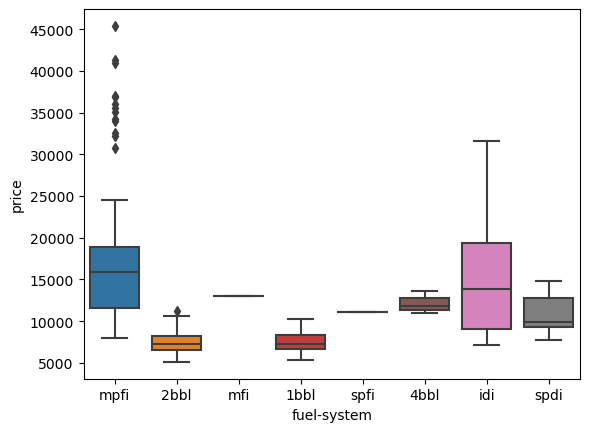

In [22]:
# fuel-system box plt viz
sns.boxplot(x="fuel-system",y= "price", data = df)

<AxesSubplot:xlabel='fuel-type-diesel', ylabel='price'>

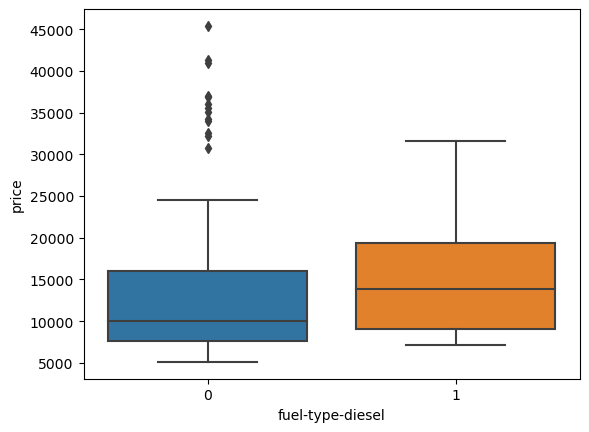

In [23]:
# fuel-type-diesel box plt viz (0 means gas, 1 means diesel)
sns.boxplot(x="fuel-type-diesel", y="price", data=df)

<AxesSubplot:xlabel='aspiration-std', ylabel='price'>

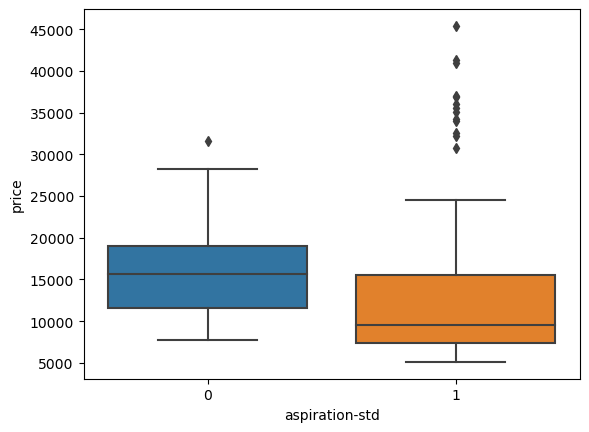

In [24]:
# aspiration-std box plt viz (0 means turbo, 1 means std)
sns.boxplot(x="aspiration-std", y="price", data=df)

## Results:
> **make** are obviously magnitude the price as "bmw, mercedes-benz, porsche" are the most expensive  
**number of doors, body-style, aspiratio type, fuel type and fuel-system** have **no relation** to the price  
**drive-wheels** shows that "rwd" is the most exp where both "fwd and 4wd" are approximetly same  
**engine-location** rear are way more expensive than front but it's just 3 records so, is it reliable??   
**num-of-cylinders** eight cylinders is more exp

## 2- Descitive Statistics: 
**Ungerstanding the data better unsing EDA ( the target variable is the price col):  
* Describe Methode ( Int or Obj)  
>the count of that variable  
    the mean  
    the standard deviation (std)  
    the minimum value  
    he IQR (Interquartile Range: 25%, 50% and 75%)  
    the maximum value  
* value_counts.to_frame Methode for objects

In [25]:
# Describe for the statistic values
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-l@k,highway-l@k,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.494045,0.477697,0.497222,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,9.944145,8.044957,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.183913,0.179613,0.203985,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,2.534599,1.840739,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.000000,0.000000,0.000000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.383582,0.324786,0.350000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.479104,0.444444,0.525000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,9.791667,7.833333,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.632836,0.538462,0.641667,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# describe the object values

df.describe(include= ["object"])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower_binned,price_binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low,Low
freq,32,115,94,118,198,145,157,92,153,171


In [27]:
# create a dataframe for value counts of num_of_doors

#counting the values for unique items
value_num_of_doors = df["num-of-doors"].value_counts().to_frame()

#renaming the col
value_num_of_doors.rename(columns={"num_of_doors": "value_counts"}, inplace=True)

#renaming the index
value_num_of_doors.index.name= "num_of_doors"

value_num_of_doors

,num-of-doors
num_of_doors,
four,115
two,86


In [28]:
#creating for loop to do the previous for each object col
object_column= df.select_dtypes(include = ["object"]).columns

for column in object_column:
    value_count  = df[column].value_counts()
    print(f'Value counts for {column}:\n{value_count}\n')

Value counts for make:
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

Value counts for num-of-doors:
four    115
two      86
Name: num-of-doors, dtype: int64

Value counts for body-style:
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

Value counts for drive-wheels:
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Value counts for engine-location:
front    198
rear       3
Name: engine-location, dtype: int64

Value counts for engine-type:
ohc      145
ohcf      15
ohcv      13
dohc   

**we notice that Value counts for engine-location:**  
 > front    198  
   rear       3  
**so, it's only 3 records for rear engine location, as a result we can't count on it as an independent variable for the price**

# Correlation btween independant variables and the dependant price
let's try the body_stle and drive_wheels and it's correlation with the price

In [29]:
# create a df with specific col and the price
df_body_wheel = df[["drive-wheels","body-style","price"]]

# group by the drive wheel
df_body_wheel.groupby(["drive-wheels"]).mean()


,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


In [30]:
# group by the body style
df_body_wheel.groupby(["body-style"]).mean()

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


### Results:  
* According to **drive-wheels** -- the **rwd** is the most expensive, where both **fwd & 4wd** are approximetly the same price  
* According to **body-style** -- the **hardtop & convertible** are the most exp, where **htachback** is the cheapest.

In [70]:
# let's group by both the previous
df_body_wheel_grouped = df_body_wheel.groupby(["drive-wheels", "body-style"], as_index= False).mean()

# let's make it more visible using pivoy methode
df_body_wheel_grouped_pivot = df_body_wheel_grouped.pivot(index = "drive-wheels", columns="body-style")

# fill the nan with 0 
df_pivot_body = df_body_wheel_grouped_pivot.fillna(0)

<AxesSubplot:xlabel='None-body-style', ylabel='drive-wheels'>

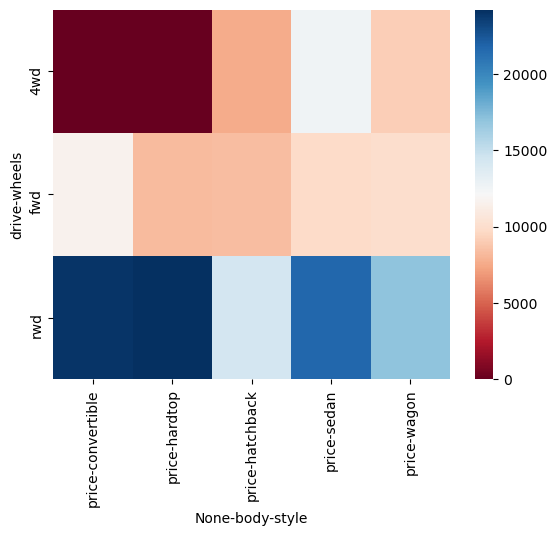

In [32]:
# visualizing the correlation table with heatmap

sns.heatmap(df_pivot_body, cmap="RdBu")

### Results:
> **rwd** is the most expensive 
> **4wd--(convertrible & hardrtop)** is the cheapest
> 

## 3- Correlations:
#### A) Peasron Correlation
Will use pearson correlation for the continous numerical values 
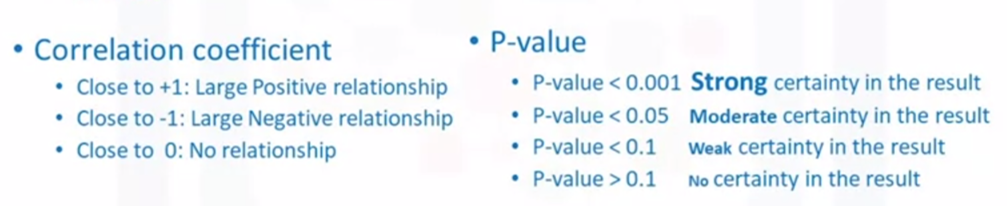

**Pearson coeffecient**   
 <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

**Probabilty(P-Value): how much the pearson corr reflects the population:**
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [33]:
# peason coeffient numerical
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-l@k,highway-l@k,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,0.554610,0.559112,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,0.036133,0.047089,0.082269,0.241064,-0.241064,-0.218233,0.218233


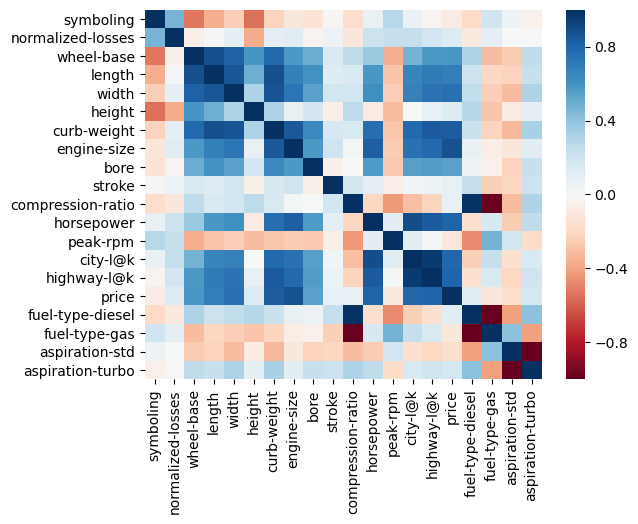

In [37]:
# pearson coeffient viz (heatmap)
sns.heatmap(df.corr(),cmap= "RdBu")
plt.pyplot.xticks(rotation= 90)
plt.pyplot.show()

## Results:  
**from the heatmap:**  
there is strong pos corr btw price and highway, city,horsepower, enginesize

In [52]:
#impost stats
from scipy import stats

# calculate pearson coeff and p value for highway
per_cof_hi, p_value_hi = stats.pearsonr(df["highway-l@k"], df["price"])


# calculate pearson coeff and p value for city-l@k
per_cof_ct, p_value_ct = stats.pearsonr(df["city-l@k"], df["price"])

# calculate pearson coeff and p value for horsepower
per_cof_hp, p_value_hp = stats.pearsonr(df["horsepower"], df["price"])

# calculate pearson coeff and p value for engine-size
per_cof_ez, p_value_ez = stats.pearsonr(df["engine-size"], df["price"])

# calculate pearson coeff and p value for curb-weight
per_cof_cw, p_value_cw = stats.pearsonr(df["curb-weight"], df["price"])

# calculate pearson coeff and p value for bore
per_cof_bo, p_value_bo = stats.pearsonr(df["bore"], df["price"])

# printing table
print("|Variable\t|\t pear_coeff\t|\t P-Value\t|")
print("--------------------------------------------")
print(f'highway-l@k|\t {per_cof_hi}|\t {p_value_hi}|')
print(f'city-l@k|\t {per_cof_ct}|\t {p_value_ct}|')
print(f'horsepower|\t {per_cof_hp}|\t {p_value_hp}|')
print(f'engine-size|\t {per_cof_ez}|\t {p_value_ez}|')
print(f'curb-weight|\t {per_cof_cw}|\t {p_value_cw}|')
print(f'bore\t|\t {per_cof_bo}|\t {p_value_bo}|')


|Variable	|	 pear_coeff	|	 P-Value	|
--------------------------------------------
highway-l@k|	 0.8011176263981971|	 3.0467845810418893e-46|
city-l@k|	 0.7898975136626946|	 3.9031064009392475e-44|
horsepower|	 0.8095745670036559|	 6.369057428260101e-48|
engine-size|	 0.8723351674455188|	 9.265491622196808e-64|
curb-weight|	 0.8344145257702845|	 2.189577238893816e-53|
bore	|	 0.54315538326266|	 8.049189483935489e-17|


## Results: 
We have **STRONG POS CORR** btw price and highway, city,horsepower, enginesize and crub weight and we are **CONFIEDENT** as p-value is way less than .001  
where with **bore** we confident that there is no corr

## B) Chi^2 test - test of association
will apply chi^2 test to correlate 2 categorical variables to understand is there a correlation btw or not.   
Null Hypothesis(Ho) is the 2 var are independent 

In [53]:
# let's check the categorical varibles
df.select_dtypes("object")

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower_binned,price_binned
0,alfa-romero,two,convertible,rwd,front,dohc,four,mpfi,Low,Low
1,alfa-romero,two,convertible,rwd,front,dohc,four,mpfi,Low,Low
2,alfa-romero,two,hatchback,rwd,front,ohcv,six,mpfi,Medium,Low
3,audi,four,sedan,fwd,front,ohc,four,mpfi,Low,Low
4,audi,four,sedan,4wd,front,ohc,five,mpfi,Low,Low
...,...,...,...,...,...,...,...,...,...,...
196,volvo,four,sedan,rwd,front,ohc,four,mpfi,Low,Low
197,volvo,four,sedan,rwd,front,ohc,four,mpfi,Medium,Medium
198,volvo,four,sedan,rwd,front,ohcv,six,mpfi,Medium,Medium
199,volvo,four,sedan,rwd,front,ohc,six,idi,Low,Medium


In [76]:
# let's check if there is relation btw engine-type and fuel-system
chi_df = df[["engine-type", "fuel-system"]]

#found that there is 1 in the engine type let's drop it
df["engine-type"].unique()
df[df["engine-type"]== 'l'] # will leave it untill understand is it wrong entry or not

# back to the relation
chi_value_cou = chi_df.value_counts()

# Pivot the DataFrame
pivot_table = chi_value_cou.reset_index().pivot(index='fuel-system', columns='engine-type', values=0)

# Fill missing values with 0
pivot_table = pivot_table.fillna(0)

# Print the resulting table
print(pivot_table)

# apply the chi^2 test
chi2 = stats.chi2_contingency(pivot_table, correction= True)
chi2


engine-type  dohc    l   ohc  ohcf  ohcv  rotor
fuel-system                                    
1bbl          0.0  0.0  11.0   0.0   0.0    0.0
2bbl          0.0  1.0  55.0   8.0   0.0    0.0
4bbl          0.0  0.0   0.0   0.0   0.0    3.0
idi           0.0  5.0  15.0   0.0   0.0    0.0
mfi           0.0  0.0   1.0   0.0   0.0    0.0
mpfi         12.0  6.0  53.0   7.0  13.0    1.0
spdi          0.0  0.0   9.0   0.0   0.0    0.0
spfi          0.0  0.0   1.0   0.0   0.0    0.0


(207.1421113661918,
 2.5875550912835265e-26,
 35,
 array([[6.56716418e-01, 6.56716418e-01, 7.93532338e+00, 8.20895522e-01,
         7.11442786e-01, 2.18905473e-01],
        [3.82089552e+00, 3.82089552e+00, 4.61691542e+01, 4.77611940e+00,
         4.13930348e+00, 1.27363184e+00],
        [1.79104478e-01, 1.79104478e-01, 2.16417910e+00, 2.23880597e-01,
         1.94029851e-01, 5.97014925e-02],
        [1.19402985e+00, 1.19402985e+00, 1.44278607e+01, 1.49253731e+00,
         1.29353234e+00, 3.98009950e-01],
        [5.97014925e-02, 5.97014925e-02, 7.21393035e-01, 7.46268657e-02,
         6.46766169e-02, 1.99004975e-02],
        [5.49253731e+00, 5.49253731e+00, 6.63681592e+01, 6.86567164e+00,
         5.95024876e+00, 1.83084577e+00],
        [5.37313433e-01, 5.37313433e-01, 6.49253731e+00, 6.71641791e-01,
         5.82089552e-01, 1.79104478e-01],
        [5.97014925e-02, 5.97014925e-02, 7.21393035e-01, 7.46268657e-02,
         6.46766169e-02, 1.99004975e-02]]))

## Results:
**The Chi^2 test Value** is 207.1421113661918  
**P-Value** is 2.5875550912835265e-26 *which way smaller than .05 so we reject the null hypotheseis, so the 2 variables are depedent*   
**Degree of freedom** is 35